# Inteligência Competitiva

O Exercício a seguir deve ser desenvolvido utilizando o ambiente R. Deve ser entregue o código fonte, comentado, em R. O prazo final para entrega da lista é o dia 28 de novembro, no horário da aula.

Criar um script que:

a) Leia do Twitter mensagens que contenham a palavra Olimpíada a partir da data 17/09/2016 e que estejam em um raio de 60Km da latitude -22° 54' 10'' (-22.90278) e longitude -43° 12' 27''(-43.2075). Deverá ser criado um dataframe com as mensagens lidas;

In [3]:
# Para responder a letra a, começo baixando o pacote necessário para puxar tweets. No meu caso, usarei o 'twitteR'.
# install.packages("twitteR", repos='http://cran.us.r-project.org', lib="C:/RPackages")
# Obs.: linha comentada para não dar problema em outras máquinas

also installing the dependencies 'bit', 'curl', 'openssl', 'R6', 'bit64', 'rjson', 'DBI', 'httr'



package 'bit' successfully unpacked and MD5 sums checked
package 'curl' successfully unpacked and MD5 sums checked
package 'openssl' successfully unpacked and MD5 sums checked
package 'R6' successfully unpacked and MD5 sums checked
package 'bit64' successfully unpacked and MD5 sums checked
package 'rjson' successfully unpacked and MD5 sums checked
package 'DBI' successfully unpacked and MD5 sums checked
package 'httr' successfully unpacked and MD5 sums checked
package 'twitteR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\NinoFabrizio\AppData\Local\Temp\Rtmp0o1gns\downloaded_packages


In [28]:
# Carregando a bibloteca
library("twitteR")

In [29]:
# Configurando meu ambiente usando as informações da minha conta no Twitter para poder puxar as informações do servidor deles
consumer_key <- 'AubI9DoHBxvW2231RiNecpTmi'
consumer_secret <- 'o0rUHjAd33MLHfTo6oPz1HjtOVd6404xEqB5pJfPY0DmNfaNem'
access_token <- '801120223504072704-MPjKnjOTCcqocYsdJfnzbPe2OwAwajN'
access_secret <- 'ORoPdE19zSyCvDUzmpiokVB7On8vcERevcKawXeNtC5hI'

setup_twitter_oauth(consumer_key, consumer_secret, access_token, access_secret)

[1] "Using direct authentication"


In [213]:
# Puxando os dados referentes ao requerido no enunciado, limitando a um número de 10000 tweets
r_stats <- searchTwitter("Olimpíada", n=10000, since='2016-09-17', geocode='-22.90278,-43.2075,60km')

# Obs.: A linha acima costuma dar problema. Mesmo assim, se persistir em dar erro, recomendo tentar a linha de baixo
# r_stats <- searchTwitter("Olimpíada", n=10000, since='2016-09-17', until='2016-11-22', geocode='-22.90278,-43.2075,60km')

# Obs.: Inicialmente eu ia excluir retweets, mas isso diminuia demais meu número total de mensagens. Abaixo deixo o código que
# mostra o número gerado ao excluir retweets
no_retweets <- strip_retweets(r_stats)
length(no_retweets)

Warning message:
In doRppAPICall("search/tweets", n, params = params, retryOnRateLimit = retryOnRateLimit, : 10000 tweets were requested but the API can only return 1394

[1] 244

In [214]:
# Verifico quantos resultados finais obtive e guardo o valor
numTweets <- length(r_stats)
numTweets

# Passo as mensagens para uma nova lista
msg <- lapply(r_stats, function(t) t$getText())

[1] 1394

In [215]:
# Agora passo as mensagens para um data frame. Anteriormente vi o tamanho da minha lista sem tweets. Esse mesmo número equivale
# ao total de tuplas no meu data frame.
msgDataFrame <- data.frame(matrix(unlist(msg), nrow=numTweets, byrow=T), stringsAsFactors=FALSE)

# Renomeio a coluna do data frame
names(msgDataFrame) <- c("Tweets")

In [216]:
# Verificando início e fim do meu data frame
head(msgDataFrame)
tail(msgDataFrame)

,Tweets
1,RT @Brittana25: Priscila e outra pessoinha que me fez gostar de escrever e acho que pela Priscila vou tentar na próxima olimpíada!
2,A única coisa que valeu a pena em 2016 foi a olimpíada
3,"É aquela coisa... Quer fazer tudo ao mesmo tempo, não consegue produzir nada no prazo certo. Esse pós-Olimpíada foi MUITO maluco."
4,RT @jairbolsonaro: Parabéns Colégio Militar de Juiz de Fora pelo 2° lugar na Olimpíada Mundial do Conhecimento. Um exemplo p/ as escolas pú…
5,Comecei a odiar a olimpíada quando descobri q ela ferrou com o cronograma inteiro da minha faculdade
6,RT @jairbolsonaro: Parabéns Colégio Militar de Juiz de Fora pelo 2° lugar na Olimpíada Mundial do Conhecimento. Um exemplo p/ as escolas pú…


,Tweets
1389,Ir a uma Olimpíada sempre foi um desejo...mas aí fui a uma Olimpíada… https://t.co/s8IIkulbbP
1390,"Pois é, até uma criança sabia em 2015 que o Rio estava quebrado. Mas tinha uma Olimpíada em 2016, né? https://t.co/GLLsT7gEYl"
1391,Posso dizer q clube já fez até estudo p/ o Engenhão de: - rebaixamento do gramado - arquibancada atrás dos gols como na Olimpíada definitiva
1392,"Nós tanto falamos dessa merda dessa Olimpíada, que ia dar ruim, mas foi só chegar o dia da abertura e pronto! O... https://t.co/WHwLevM4Tf"
1393,https://t.co/xmfv7sujl9 https://t.co/cbzCaXY9T4
1394,Mauro Ventura: 3 vezes medalhista de ouro na Olimpíada de Matemática ensina como tornar a disciplina mais atraente… https://t.co/O7EdTstldy


b) A partir dos textos lidos no item a: realizar a limpeza removendo caracteres como “.-‘´:”, pontuação, números e URLs; converter os caracteres de todas as palavras para minúsculo; remover stopwords; remover espaços;

In [217]:
# Para responder a letra b, começo por baixar o pacote 'tm' para tirar stop words dos tweets
# install.packages("tm", repos='http://cran.us.r-project.org', lib="C:/RPackages")
# Obs.: linha comentada para não dar problema em outras máquinas

In [218]:
library("tm")

In [219]:
# Criando meu grupo de stopwords em portugês do Brasil
stopwordsPTBR <- c("a", "agora", "ainda", "alguem", "algum", "alguma", "algumas", "alguns", "ampla", "amplas", "amplo", "amplos",
                 "ante", "antes", "ao", "aos", "apos", "aquela", "aquelas", "aquele", "aqueles", "aquilo", "as", "ate",
                 "atraves", "cada", "coisa", "coisas", "com", "como", "contra", "contudo", "da", "daquele", "daqueles", "das",
                 "de", "dela", "delas", "dele", "deles", "depois", "dessa", "dessas", "desse", "desses", "desta", "destas",
                 "deste", "deste", "destes", "deve", "devem", "devendo", "dever", "devera", "deverao", "deveria", "deveriam",
                 "devia", "deviam", "disse", "disso", "disto", "dito", "diz", "dizem", "do", "dos", "e", "eh", "ela", "elas",
                 "ele", "eles", "em", "enquanto", "entre", "era", "essa", "essas", "esse", "esses", "esta", "esta", "estamos",
                 "estao", "estas", "estava", "estavam", "estavamos", "este", "estes", "estou", "eu", "fazendo", "fazer", "feita",
                 "feitas", "feito", "feitos", "foi", "for", "foram", "fosse", "fossem", "grande", "grandes", "ha", "isso", "isto",
                 "ja", "la", "lhe", "lhes", "lo", "mas", "me", "mesma", "mesmas", "mesmo", "mesmos", "meu", "meus", "minha",
                 "minhas", "muita", "muitas", "muito", "muitos", "na", "nao", "nas", "nem", "nenhum", "nessa", "nessas", "nesta",
                 "nestas", "ninguem", "no", "nos", "nossa", "nossas", "nosso", "nossos", "num", "numa", "nunca", "o", "os", "ou",
                 "outra", "outras", "outro", "outros", "para", "pela", "pelas", "pelo", "pelos", "pequena", "pequenas", "pequeno",
                 "pequenos", "per", "perante", "pode", "pude", "podendo", "poder", "poderia", "poderiam", "podia", "podiam",
                 "pois", "por", "porem", "porque", "posso", "pouca", "poucas", "pouco", "poucos", "primeiro", "primeiros",
                 "propria", "proprias", "proprio", "proprios", "quais", "qual", "quando", "quanto", "quantos", "que", "quem",
                 "sao", "se", "seja", "sejam", "sem", "sempre", "sendo", "sera", "serao", "seu", "seus", "si", "sido", "so",
                 "sob", "sobre", "sua", "suas", "talvez", "tambem", "tampouco", "te", "tem", "tendo", "tenha", "ter", "teu",
                 "teus", "ti", "tido", "tinha", "tinham", "toda", "todas", "todavia", "todo", "todos", "tu", "tua", "tuas",
                 "tudo", "ultima", "ultimas", "ultimo", "ultimos", "um", "uma", "umas", "uns", "vendo", "ver", "vez", "vindo",
                 "vir", "voce", "voces", "vc", "vcs", "vos", "mais", "menos", "sim", "nao", "vai", "vao", "ser", "ngm", "toa",
                  "ir", "indo", "ia", "dar", "ai", "ali")

In [249]:
# Crio um novo data frame com meu conteúdo tratado
treatedDataFrame <- msgDataFrame

# Para cada tupla, faço as mudanças necessárias
for(i in 1:numTweets) {
    
    # Aqui se tiram URLs
    treatedDataFrame$Tweets[i] <- gsub(" ?(f|ht)(tp)(s?)(://)(.*)[.|/](.*)", " ",treatedDataFrame$Tweets[i])

    # Aqui se tiram ascentos
    treatedDataFrame$Tweets[i] <- iconv(treatedDataFrame$Tweets[[i]], from="UTF-8",to="ASCII//TRANSLIT")

    # Aqui se substituem maiúsculas por minúsculas
    treatedDataFrame$Tweets[i] <- tolower(treatedDataFrame$Tweets[i])

    # Aqui removo sitações a outras contas e a sigla de retweet
    treatedDataFrame$Tweets[i] <- gsub("RT @[0-9]*[a-z]*[A-Z]*"," ",treatedDataFrame$Tweets[i])
    treatedDataFrame$Tweets[i] <- gsub("rt @[0-9]*[a-z]*[A-Z]*"," ",treatedDataFrame$Tweets[i])
    treatedDataFrame$Tweets[i] <- gsub("@[0-9]*[a-z]*[A-Z]*"," ",treatedDataFrame$Tweets[i])
    
    # Aqui se tiram demais caracteres não desejados
    treatedDataFrame$Tweets[i] <- gsub("[][?+!#$%()*,.:;<=>^_`^´¨¬|~.{}¦…\"\'\\\n\t/0123456789-]"," ",treatedDataFrame$Tweets[i])
    
    # Aqui tiro as stopwords
    treatedDataFrame$Tweets[i] <- removeWords(treatedDataFrame$Tweets[i][[1]],stopwordsPTBR)

    # Aqui se tiram os espaços no início e no fim
    treatedDataFrame$Tweets[i] <- lapply(treatedDataFrame$Tweets[i], function(t) gsub("^\\s+|\\s+$", "", t))
}

# Verifico início e fim da meu novo data frame
head(treatedDataFrame)
tail(treatedDataFrame)

,Tweets
1,priscila pessoinha fez gostar escrever acho priscila vou tentar proxima olimpiada
2,unica valeu pena olimpiada
3,quer tempo consegue produzir nada prazo certo pos olimpiada maluco
4,parabens colegio militar juiz fora lugar olimpiada mundial conhecimento exemplo p escolas pu
5,NA
6,parabens colegio militar juiz fora lugar olimpiada mundial conhecimento exemplo p escolas pu


,Tweets
1389,olimpiada desejo fui olimpiada
1390,crianca sabia rio quebrado olimpiada ne
1391,dizer q clube fez estudo p engenhao rebaixamento gramado arquibancada atras gols olimpiada definitiva
1392,tanto falamos merda olimpiada ruim chegar dia abertura pronto
1393,
1394,mauro ventura vezes medalhista ouro olimpiada matematica ensina tornar disciplina atraente


In [250]:
# Vejo que alguns valores foram perdidos no meio da meu tratamento, optei por tirar as tuplas com valores NA e com valores vazios

# Retirando valores NA
tempList <- treatedDataFrame[!is.na(treatedDataFrame[,1]),]

# Retirando string vazias
tempList <- tempList[tempList != ""]

# Verificando quantos valores sobraram
listNum <- length(tempList)
listNum

# Criando o data frame final
tweetsDataFrame <- data.frame(matrix(unlist(tempList), nrow=listNum, byrow=T), stringsAsFactors=FALSE)
names(tweetsDataFrame) <- c("Tweets")

[1] 1370

In [251]:
# Verifico início e fim da meu novo data frame
head(tweetsDataFrame)
tail(tweetsDataFrame)

,Tweets
1,priscila pessoinha fez gostar escrever acho priscila vou tentar proxima olimpiada
2,unica valeu pena olimpiada
3,quer tempo consegue produzir nada prazo certo pos olimpiada maluco
4,parabens colegio militar juiz fora lugar olimpiada mundial conhecimento exemplo p escolas pu
5,parabens colegio militar juiz fora lugar olimpiada mundial conhecimento exemplo p escolas pu
6,tive levar blusa olimpiada costureira pq tava horrivel


,Tweets
1365,capa desafios barra tijuca olimpiada
1366,olimpiada desejo fui olimpiada
1367,crianca sabia rio quebrado olimpiada ne
1368,dizer q clube fez estudo p engenhao rebaixamento gramado arquibancada atras gols olimpiada definitiva
1369,tanto falamos merda olimpiada ruim chegar dia abertura pronto
1370,mauro ventura vezes medalhista ouro olimpiada matematica ensina tornar disciplina atraente


c) Realizar o stemming dos textos;

In [223]:
# Para responder a letra c, usarei o pacote 'tm' baixado anteriormente por mim.
# Mas antes, preciso baixar um novo pacote, 'SnowmallC'
# install.packages("SnowballC", repos='http://cran.us.r-project.org', lib="C:/RPackages")
# Obs.: linha comentada para não dar problema em outras máquinas

In [224]:
library("SnowballC")

In [263]:
# Começo por criar um corpus contendo os dados do meu data frame
src <- DataframeSource(tweetsDataFrame)
options(mc.cores=1)
c <- Corpus(src)

# Crio uma cópia desse corpus para usar de dicionário para completar as palavras derivadas do meu stemming
c_copy <- c

In [467]:
# Vi que o pacote 'tm' permite remover stopwords para português, com o auxílio do pacote 'SnowballC', só que me retornando um
# corpus. Utilizarei ele para tirar as stopwords que sobraram tirar anteriormente por mim
corpus.temp <- tm_map(c, removeWords, stopwords("portuguese"))

# Faço o stemming das palavras para cada mensagem pega do data frame usando a devida função do pacote 'tm'
# Obs.: A linha abaixo pode demorar MUITO para executar, dependendo de quantos tweets foram puxados
corpus.temp <- tm_map(corpus.temp, stemDocument)

# Verifico o resultado do stemming
inspect(corpus.temp)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1370

[[1]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 88

[[2]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 37

[[3]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 76

[[4]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 98

[[5]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 98

[[6]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 54

[[7]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 24

[[8]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 36

[[9]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 98

[[10]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 98

[[11]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 98

[[12]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 98

[[13]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 98

[[14]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 98

[[15]]
<<PlainTextDocument>>


In [469]:
# Finalmente, completo meu primeiro stemming às suas formas originais e verifico meu resultado final
# Esse código é só para omitir warnings (polui a tela, pois mostra warnings para cada tweet verificado)
oldw <- getOption("warn")
options(warn = -1)

# Completando e verificando o stemming
# Obs.: A linha abaixo pode demorar MUITO para executar, dependendo de quantos tweets foram puxados
corpus.final <- tm_map(corpus.temp, stemCompletion, dictionary = c_copy)
inspect(corpus.final)

# Aqui retorno o tipo de warning original
options(warn = oldw)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1370

[[1]]
priscila   pessoinha   fez gostar  escrev  acho   priscila vou tentar  proxima olimpiada 
                                                                                 content 
                                                                                    <NA> 
                                                                                    meta 

[[2]]
unica   valeu  pena         olimpiada                                  <NA> 
                              content                                  meta 

[[3]]
quer     tempo   consegu produzir nada  prazo certo   pos olimpiada   maluco 
                                                                     content 
                                                                        <NA> 
                                                                        meta 

[[4]]
paraben colegio militar  juiz       lugar  olimpi

d) Criar e exibir a DTM. Apresentar os termos mais encontrados e as respectivas freqüências;

In [470]:
# Antes de criar a DTM, tenho que criar o PlainTextDocument necessário
c_temp <- tm_map(corpus.temp, PlainTextDocument)

# Fazendo a DTM, adicionando a ela o peso de frequência de expressões e passando meus resultados a um novo data frame
dtm <- DocumentTermMatrix(c_temp, control = list(tokenize = BigramTokenizer, weighting=weightTf))
freq <- as.data.frame(inspect(dtm))

<<DocumentTermMatrix (documents: 1370, terms: 1515)>>
Non-/sparse entries: 15103/2060447
Sparsity           : 99%
Maximal term length: 37
Weighting          : term frequency (tf)

              Terms
Docs           &gt &gt &gt estadaoesport &gt premiacao &lt leia aberta proxima
  character(0)       0                 0             0        0              0
  character(0)       0                 0             0        0              0
  character(0)       0                 0             0        0              0
  character(0)       0                 0             0        0              0
  character(0)       0                 0             0        0              0
  character(0)       0                 0             0        0              0
  character(0)       0                 0             0        0              0
  character(0)       0                 0             0        0              0
  character(0)       0                 0             0        0              0
  characte

In [472]:
# Passando a um outro data frame as expressões e sua respectiva frequência em coluna
freqsDataFrame <- as.data.frame(colSums(freq))

# Dando nome devido a coluna de frequências
names(freqsDataFrame) <- c("Frequence")

# Passando os nomes das tuplas, que são as espressões, para uma nova coluna no data frame criado
freqsDataFrame$Expression <- rownames(freqsDataFrame)

# Colocando o data frame em ordem decrescente de valores Frequence
freqsDataFrame <- freqsDataFrame[with(freqsDataFrame, order(-Frequence)), ]

# Tornando o nome das tuplas uma sequência numérica referente à posição da respectiva tupla
rownames(freqsDataFrame) <- seq(length=nrow(freqsDataFrame))

# Trocando a ordem das colunas para que coluna das espressões venha antes da coluna das frequências
freqsDataFrame <- freqsDataFrame[,c(2,1)]

# Mostrando os 10 termos mais encontrados
head(freqsDataFrame, 10)

,Expression,Frequence
1,fla x,870
2,lugar olimpiada,581
3,flu x,580
4,colegio militar,579
5,olimpiada mundial,578
6,conhecimento exemplo,577
7,exemplo p,577
8,juiz lugar,577
9,militar juiz,577
10,mundial conhecimento,577


e) Apresentar um histograma (termo x freqüência) para os temos que apareceram pelo menos 40 vezes;

In [473]:
# Para responder a letra e, irei criar um data frame que é o subconjunto do meu data frame anterior que só possui os dados
# cujo valor na coluna de frequência é maior ou igual a 40
freqsForty <- subset(freqsDataFrame, freqsDataFrame$Frequence >= 40)

# Vendo quais são esses termos
freqsForty

,Expression,Frequence
1,fla x,870
2,lugar olimpiada,581
3,flu x,580
4,colegio militar,579
5,olimpiada mundial,578
6,conhecimento exemplo,577
7,exemplo p,577
8,juiz lugar,577
9,militar juiz,577
10,mundial conhecimento,577


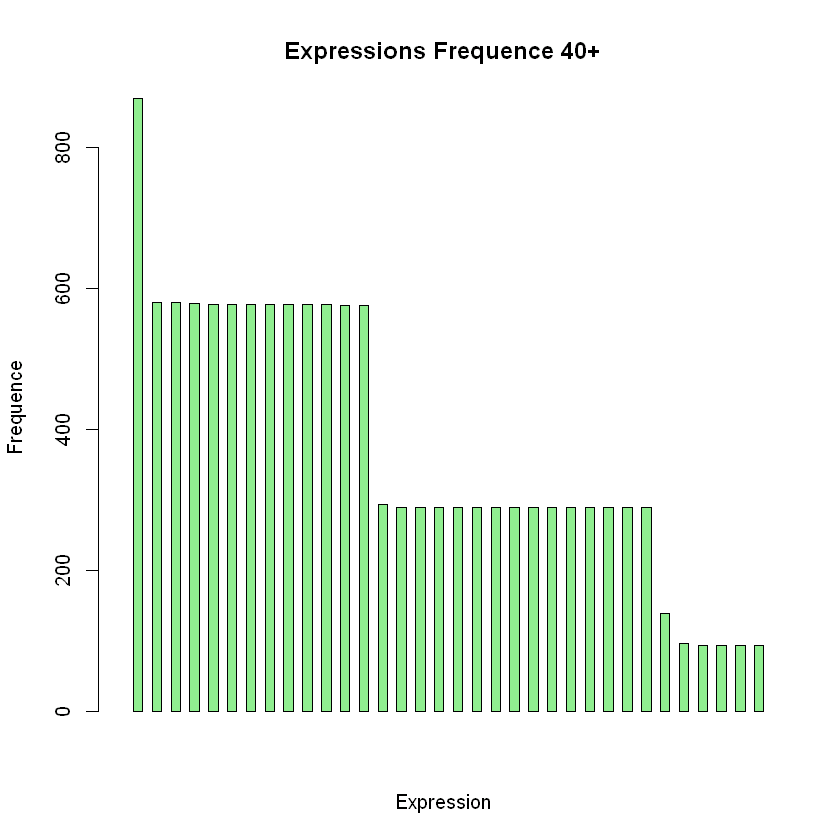

In [474]:
# Para criar o histograma, usarei o barplot. Como são muitas expressões (e algumas delas são longas), optei em mostrar apenas as
# barras sem sua respectiva expressão. Vale notar que a ordem da esquerda para adireita no meu barplot é exatamente a ordem
# decrescente em frequência do meu data frame
barplot(freqsForty$Frequence, freqsForty$Expression, main = "Expressions Frequence 40+", col = "lightgreen",
        xlab = "Expression", ylab = "Frequence", xlim = c(0,nrow(freqsForty)), width = 0.5, space = 1, names.arg = NULL,
        legend.text = NULL)

f) Apresentar os termos associados com o termo ouro segundo uma correlação de 60%;

In [480]:
# Para responder a letra f, crio um data frame que é o subconjunto do meu data frame original de frequências que só possui os
# dados que possuem expressão contendo o termo "ouro"
goldFreqDF <- freqsDataFrame[grep("ouro", freqsDataFrame$Expression), ]
rownames(goldFreqDF) <- seq(length=nrow(goldFreqDF))
goldFreqDF

,Expression,Frequence
1,medalha ouro,19
2,ouro olimpiada,19
3,ouro brasil,2
4,porraaaa ouro,2
5,levou ouro,1
6,medalhista ouro,1
7,ouro atletismo,1
8,ouro final,1
9,ouro jeito,1


In [482]:
# Calculo o equivalente ao 100% de frequências nesse data frame
totalFreq <- sum(goldFreqDF$Frequence)

# Para cada tupla, coloco o cálculo da correlação que o termo tem com a frequência total em que aparece a palavra ouro dentro
# de uma nova coluna
goldFreqDF$Correlation <- goldFreqDF$Frequence / totalFreq

# Infelizmente, a correlação máxima que consegui foi de pouco acima de 40% com dados coletados por mim no dia 24/11. De qualquer
# forma, houve empate entre os termos "medalha ouro" e "ouro olimpiada" para 0.4042553 de correlação
goldFreqDF

,Expression,Frequence,Correlation
1,medalha ouro,19,0.4042553
2,ouro olimpiada,19,0.4042553
3,ouro brasil,2,0.04255319
4,porraaaa ouro,2,0.04255319
5,levou ouro,1,0.0212766
6,medalhista ouro,1,0.0212766
7,ouro atletismo,1,0.0212766
8,ouro final,1,0.0212766
9,ouro jeito,1,0.0212766


g) Apresentar um wordcloud com termos cuja freqüência seja de pelo menos 20;

In [ ]:
# Para responder a letra g, usarei o pacote 'wordcloud'
# install.packages("wordcloud", repos='http://cran.us.r-project.org', lib="C:/RPackages")
# Obs.: linha comentada para não dar problema em outras máquinas

In [485]:
library("wordcloud")

In [484]:
# Criar um data frame que é o subconjunto do meu data frame anterior que só possui os dados cujo valor na coluna de frequência é
# maior ou igual a 20
freqsTwenty <- subset(freqsDataFrame, freqsDataFrame$Frequence >= 20)

# Vendo quantos são no total para ter uma noção
nrow(freqsTwenty)

[1] 61

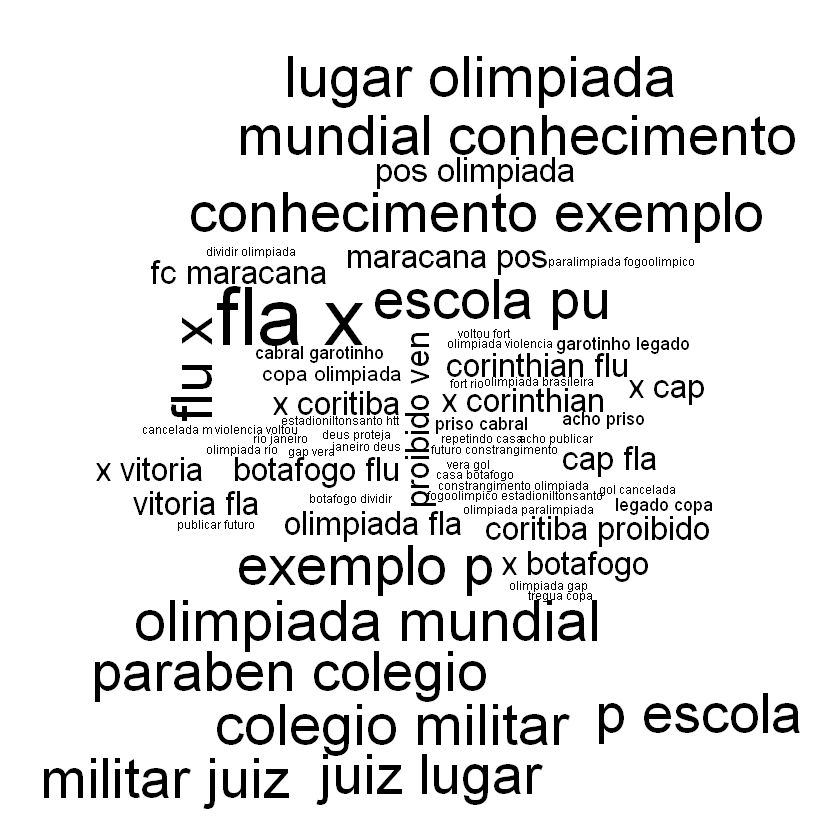

In [487]:
# Monto meu wordcloud
wordcloud(freqsTwenty$Expression, freqsTwenty$Frequence)

h) Apresentar um wordcloud com cores;

In [490]:
# Para responder a letra h, usarei o pacote 'RColorBrewer'
# install.packages("RColorBrewer", repos='http://cran.us.r-project.org', lib="C:/RPackages")
# Obs.: linha comentada para não dar problema em outras máquinas

Warning message:
: package 'RColorBrewer' is in use and will not be installed

In [491]:
library(RColorBrewer)

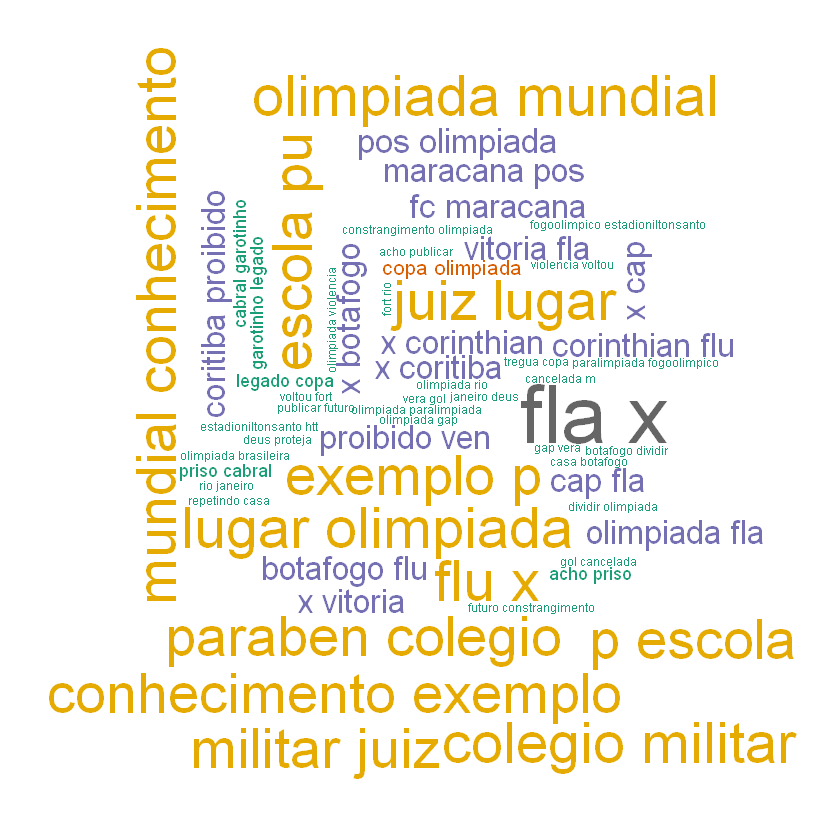

In [492]:
# Crio meu conjunto para definir as cores e faço o novo wordcloud colorido
pal2 <- brewer.pal(8,"Dark2")
wordcloud(freqsTwenty$Expression, freqsTwenty$Frequence, colors=pal2, random.color = FALSE)

i) Apresentar o dendogram do cluster hierárquico identificando os clusters;

In [499]:
# Para responder a letra i, preciso calcular antes a matriz de distância da frequência entre cada expressão
# Obs.: No enunciado não está especificado, mas estou usando como base meu data frame dos itens "g" e "h" por me gerar uma
# quantidade mais controlada de clusters
freqDist <- dist(freqsTwenty[, 2])

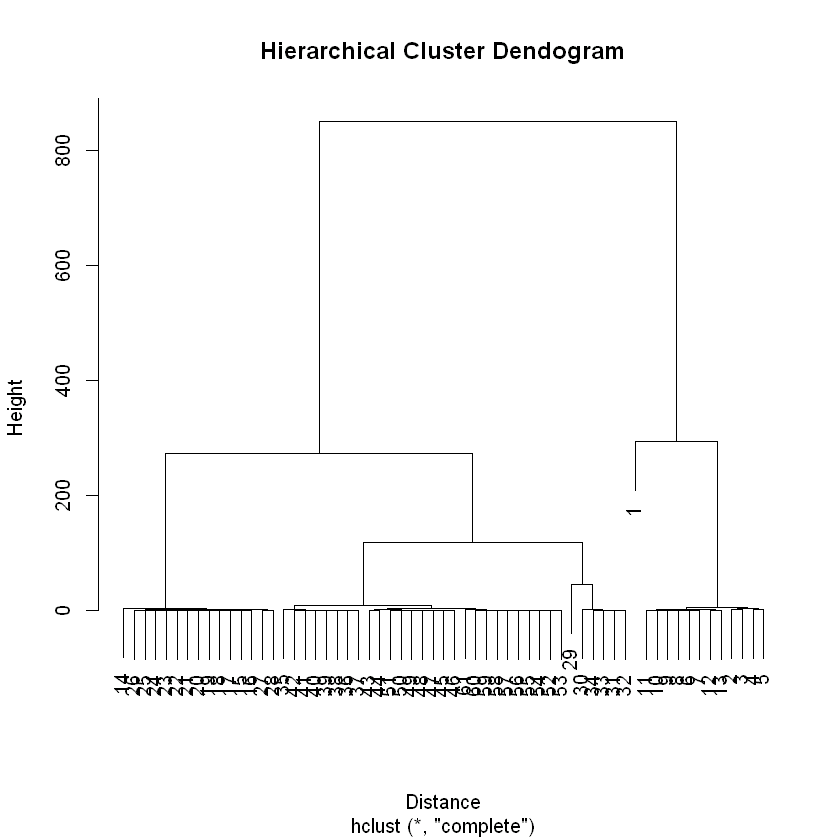

In [500]:
# Faço o cluster hierárquico usando hclust e monto seu dendograma
HCluster <- hclust(freqDist)
plot(HCluster, main = "Hierarchical Cluster Dendogram", xlab = "Distance")

# Posso perceber pelo dendograma que um número razoavelmente bom de clusters é 4 em uma altura entre 200 e 300 aproximadamente.
# Vale ressaltar que isso vale para os dados que coletei no dia 24/11.

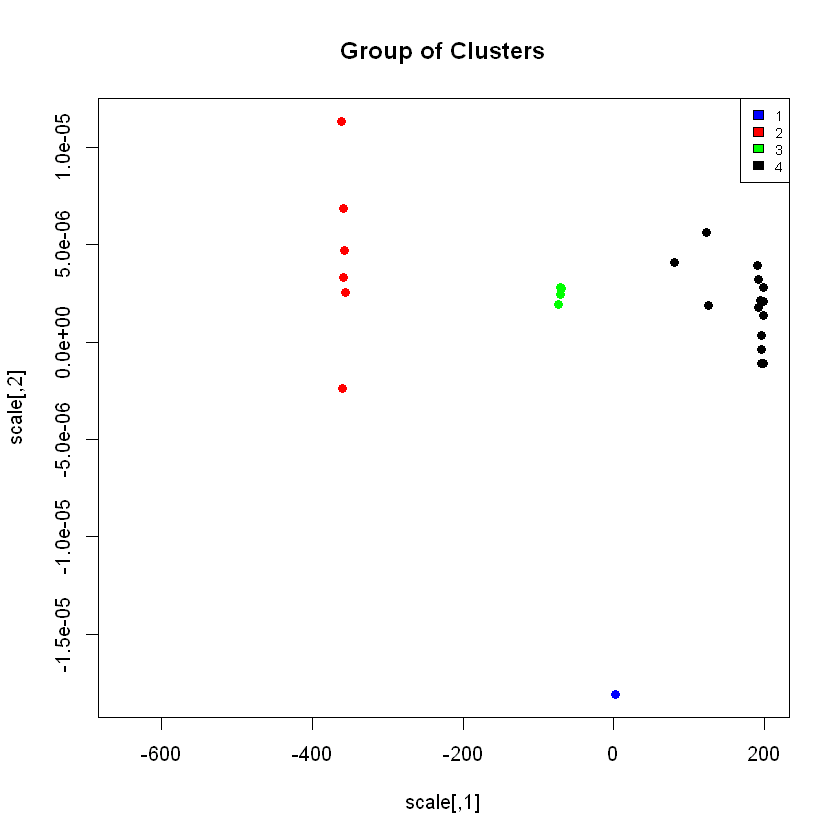

In [501]:
# Para visualizar melhor, farei um plot mostrando os grupos de clusters. Começo por dividir minha árvore nos 4 grupos
cluster <- cutree(HCluster, 4)

# Faço o plot com as distâncias como dimensões e mostro os pontos representando cada grupo
scale <- cmdscale(freqDist)
groups <- levels(factor(cluster))
plot(scale, type = "n", main = "Group of Clusters")
colors <- c("blue", "red", "green", "black")

for(i in seq_along(groups)){
  points(scale[factor(cluster) == groups[i], ], col = colors[i], pch = 16)
}

# Monto uma legenda para dizer que cor é cada grupo
legend("topright", legend = groups, fill = colors, border = "black", cex = 0.7)

# O plot me mostra que de fato esse número de clusters é razoávelmente bom. Mas é notável que um único valor ficou completamente
# isolado do resto

j) Usando o método k-means apresentar o cluster de termos;

In [502]:
# Para responder a letra j, precisarei do pacote 'cluster'
library(cluster)

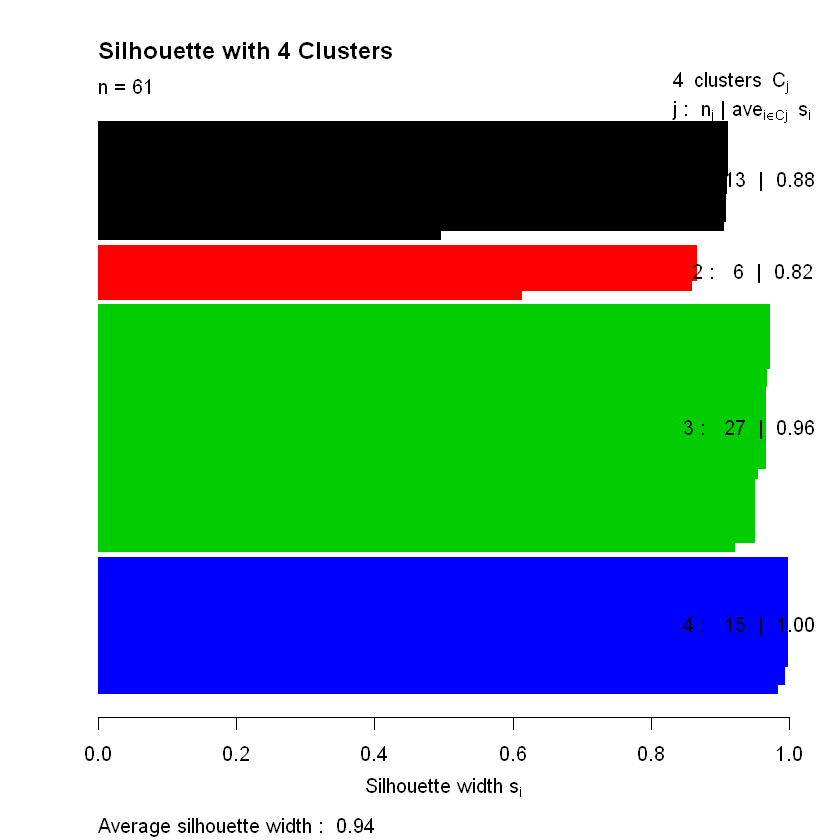

In [517]:
# Uso seed para evitar valores randômicos ao usar  o kmeans
set.seed(1)

# Farei o kmeans para clusterizar, com 4 clusters, usando como referência o item anterior
kMeansFour <- kmeans(freqsTwenty[, 2], 4)

# Uso silhouette para avaliar a qualidade do meu kmeans
silho <- silhouette(kMeansFour$cluster, freqDist)
plot(silho, main = "Silhouette with 4 Clusters", col = 1:4)

# Sei que o valor de cada coluna horizontal representa a diferença do quão próximo o elemento está dos integrantes do seu 
# grupo com o quão distante ele tá dos integrantes dos outros grupos. A clusterização de 4 possui valores muito grandes, o que o 
# torna um candidato não bom para número de clusters. Para ser o melhor número possível de clusters, nesse caso, as colunas
# deveriam estar o mais próximas possíveis do valor 0.0 em relação ao eixo horizontal